# Big Data Example
In this case, we use FIFA20 player data as an example of Big Data.
While the actual data consists of about 18,000 entries, which might not qualify as "Big Data" strictly, it's still an amount that a human cannot easily review in its entirety.
Since it's impossible to review all the data manually, the fundamental concept of Big Data analysis is to use a computer to grasp an overview of the dataset.

Based on statistical knowledge, the mean and the variance (or standard deviation) are important statistics to represent characteristics of the dataset.
First, let's calculate the average wage and its standard deviation of all the players.

In [202]:
import pandas as pd # import pandas module to process the dataset
import matplotlib.pyplot as plt # import pyplot module to draw a graph

# Read FIFA20 data
player_df = pd.read_csv('./players_20.csv')

# Calculate the mean and the variance
print('Average wage:', player_df['wage_eur'].mean(), 'Standard deviation:', player_df['wage_eur'].std())


Average wage: 9456.942772732247 Standard deviation: 21351.714095257325


The soccer players　in FIFA20 are well-known and earn very high wages.
However, when looking at the average, it doesn't seem to be high.
Checking the average and the standard deviation additionally, it seems that the standard deviation is large and there are players with negative wages.
However, there's no soccer player to have negative wages, making the information derived from the mean and the standard deviation feel odd.

In Big Data analysis, it's crucial to gain insights into the data set, and computing and examining basic statistics is vital. 
Moreover, visualization often enhances our understanding of the dataset.
To verify this, we will examine the distribution of wages.
We draw a graph with respect to players' wages.

<AxesSubplot: >

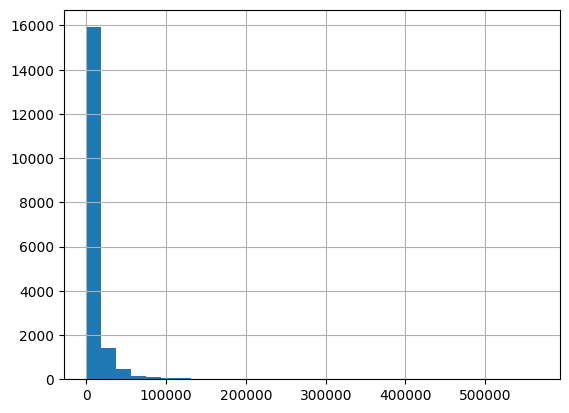

In [203]:
# Dras the hist gram with respect to players' wages
player_df['wage_eur'].hist(bins=30)

The distribution is skewed to the left and is entirely different from the bell curve one might imagine based on the mean and the standard deviation.
Such a distribution is commonly seen in wage distributions and the mean is not always a representative value for the distribution.

Next, we will check the nationalities of the players in FIFA20.

<BarContainer object of 10 artists>

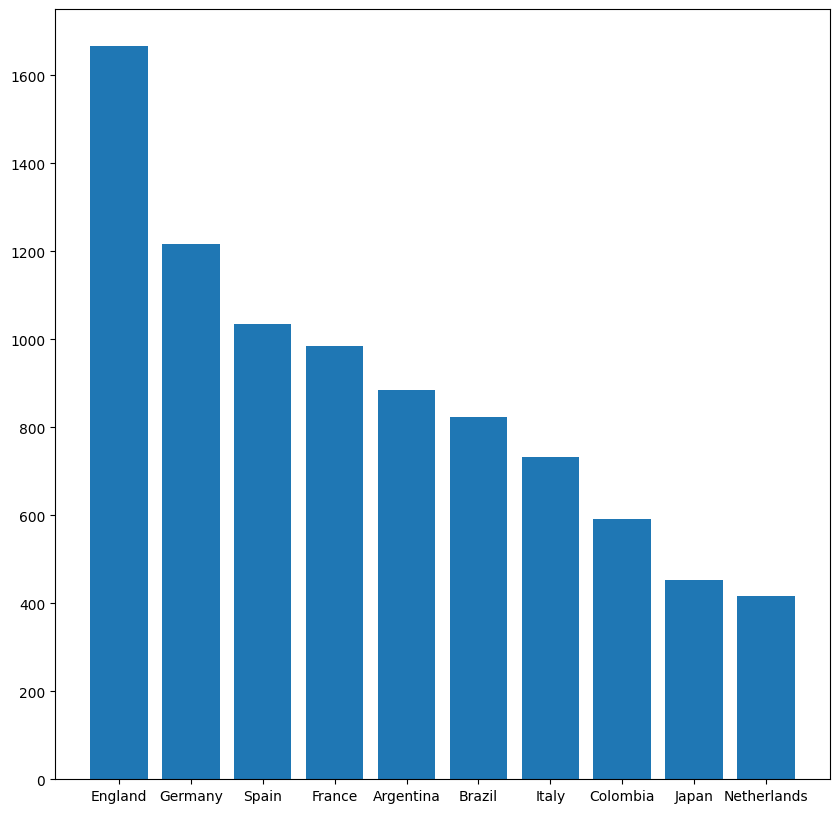

In [204]:
# Pick up only nationality attribute
nationalities = player_df['nationality']
# Pick up the top 10 countries which the most players belong to
countries = nationalities.value_counts(sort=True).head(10).to_dict().keys()
# Count the number of players which belong to each the top 10 countries
numbers = nationalities.value_counts(sort=True).head(10).to_list()

# Draw a bar graph
plt.figure(figsize=(10,10))
plt.bar(countries, numbers)

The distribution of nationalities in all players in FIFA20 is quite convincing.

Next, we will draw the distribution of nationalities for players aged 23 and under.

<BarContainer object of 10 artists>

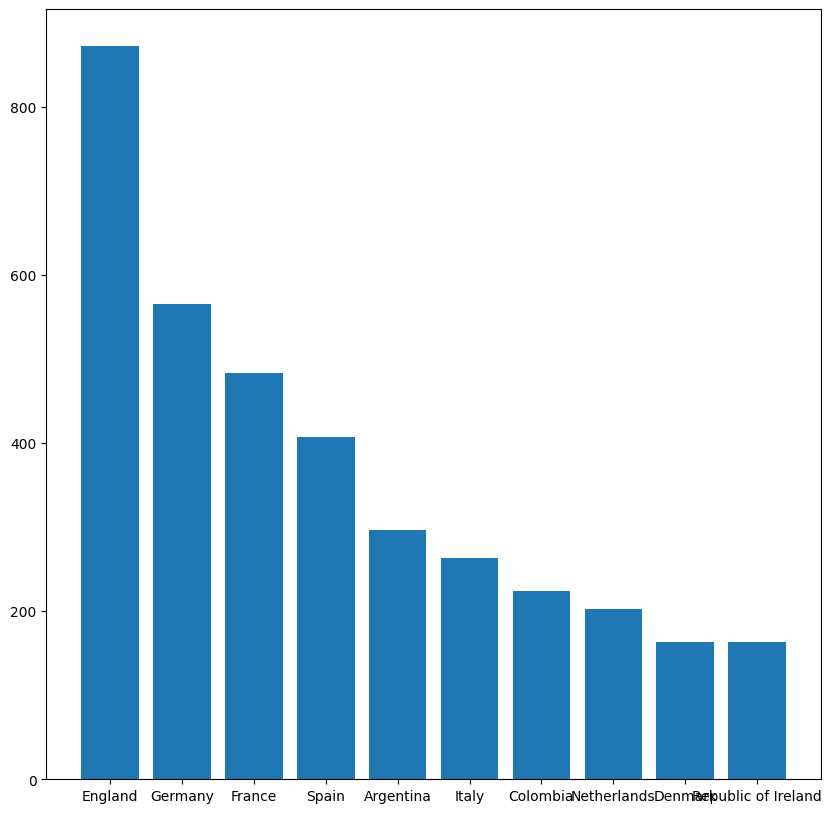

In [167]:
# Pick up under 23 players from all FIFA20 players
young_player = player_df.query('age <= 23')
# Focus on their natinalities and pick up the top 10 countries
nationalities = young_player['nationality']
countries = nationalities.value_counts(sort=True).head(10).to_dict().keys()
numbers = nationalities.value_counts(sort=True).head(10).to_list()

# Draw bar graph
plt.figure(figsize=(10,10))
plt.bar(countries, numbers)

While the top rankings remain unchanged, they might be influenced by the size of the domestic soccer leagues.
Therefore, we will check the distribution of nationalities for players aged 23 and under who have high ability ratings set in FIFA20.

<BarContainer object of 10 artists>

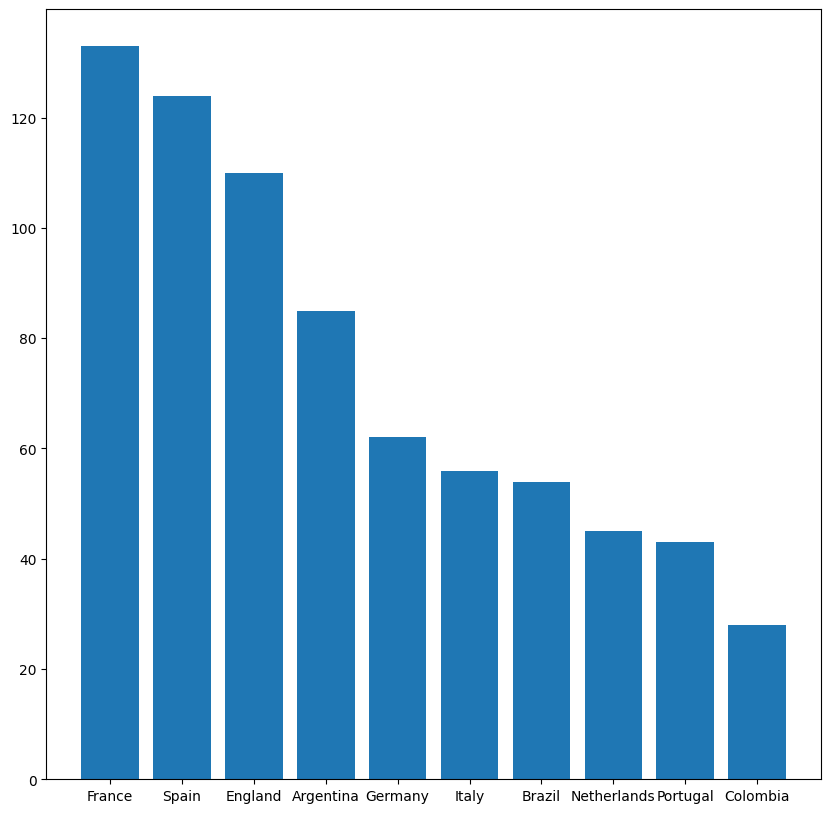

In [206]:
# Pick up players aged 23 and under with high ability
young_potential_player = player_df.query('age <= 23 & potential >= 80')
# Focus on their natinalities and pick up the top 10 countries
nationalities = young_potential_player['nationality']
countries = nationalities.value_counts(sort=True).head(10).to_dict().keys()
numbers = nationalities.value_counts(sort=True).head(10).to_list()

# Draw bar graph
plt.figure(figsize=(10,10))
plt.bar(countries, numbers)

The top-ranked natinalities have changed significantly.
This shows the countries that are producing promising young players.
Such analysis of characteristics of each country in relation to sports is referred to as "sports metrics."

# Deep Learning Example
In this case, we will implement two types of neural network systems.
We will be using PyTorch for the construction of the neural network.
Even if you don't have an in-depth understanding of the deep learning theory, you can easily build a neural network system.

## Image recognition
This task involves recognizing handwritten digits, and it's implemented using a CNN (Convolutional Neural Network).

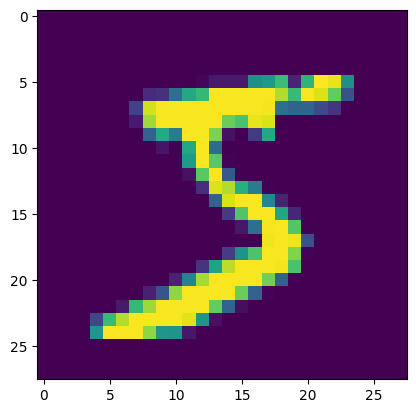

In [207]:
from PIL import Image # Import image processing module
import matplotlib.pyplot as plt
import torch # Import PyTorch library for deep learning
import torchvision # Import TorchVision library for image processing

# Define the preprocessing of image data.
# Image data is converted into tensors.
transform = torchvision.transforms.Compose(
    [torchvision.transforms.ToTensor()])

# Download training data and test data in MNIST dataset
train_mnist = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_mnist = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Display MNIST data
plt.imshow(train_mnist[0][0][0])
plt.show()

Next, we'll design a neural network using CNN.

In [192]:
# Define Dataloader which outputs for every 100 training data randomly.
train_loader = torch.utils.data.DataLoader(train_mnist, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_mnist, batch_size=100, shuffle=True)

# Define neural network
class CNN(torch.nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = torch.nn.Conv2d(1, 32, 3) # 28x28x1 -> 26x26x32 (CNN)
        self.conv2 = torch.nn.Conv2d(32, 64, 3) # 26x26x32 -> 24x24x64  (CNN)
        self.pool = torch.nn.MaxPool2d(2, 2) # 24x24x64 -> 12x12x64 (Max Pooling)
        self.fc1 = torch.nn.Linear(12 * 12 * 64, 128) # Fully-connected layer
        self.fc2 = torch.nn.Linear(128, 10) # Fully-connected layer

    def forward(self, x):
        x = torch.nn.functional.relu(self.conv1(x)) # Apply the convolution process to the input data
        h = torch.nn.functional.relu(self.conv2(h))) # Apply the convolution process to the hidden data
        h = self.pool(h) # Apply max pooling to the hidden data
        h = torch.flatten(h, start_dim=1) # Convert the tensor to a vector
        h = torch.nn.functional.relu(self.fc1(h)) # Apply the fully-connected layer to the vector
        y = self.fc2(h) # Apply the fully-connected layer to the hidden data
        return y

# Instantiate the defined neural network
model = CNN()
# Define a loss function
criterion = torch.nn.CrossEntropyLoss()
# Define an optimizer which minimizes the loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

# Training loop
epochs = 5
for epoch in range(epochs):
    total_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        # Initialize the optimizer
        optimizer.zero_grad()
        
        # Predict the target
        outputs = model(inputs)
        # Calculate the error between the prediction and the target
        loss = criterion(outputs, labels)
        # Train the neural network
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        if i == 0 or (i+1) % 100 == 0:
            print('{0}, {1}, Loss:{2}'.format(epoch+1, i+1, total_loss/(i+1)))
    print('Total loss:{}'.format(total_loss/(i+1)))
    
    total_loss = 0.0
    

1, 1, Loss:2.302508592605591
1, 100, Loss:1.2871812960505487
1, 200, Loss:0.8616459664702415
1, 300, Loss:0.6872700532774131
1, 400, Loss:0.5912534449249506
1, 500, Loss:0.5299148426800966
1, 600, Loss:0.48306401836375396
Total loss:0.48306401836375396
2, 1, Loss:0.22480414807796478
2, 100, Loss:0.22661146812140942
2, 200, Loss:0.21571434758603572
2, 300, Loss:0.2005547033250332
2, 400, Loss:0.18905060742050409
2, 500, Loss:0.17852447936683893
2, 600, Loss:0.1718128827897211
Total loss:0.1718128827897211
3, 1, Loss:0.036295510828495026
3, 100, Loss:0.11886833198368549
3, 200, Loss:0.10938205178827047
3, 300, Loss:0.1055474870155255
3, 400, Loss:0.1045806081360206
3, 500, Loss:0.10268020510300994
3, 600, Loss:0.09965146093939742
Total loss:0.09965146093939742
4, 1, Loss:0.05902298539876938
4, 100, Loss:0.0726595501974225
4, 200, Loss:0.07346554788760841
4, 300, Loss:0.0734886292864879
4, 400, Loss:0.07112039927160367
4, 500, Loss:0.0709979388024658
4, 600, Loss:0.07024729566803822
Total

The error has decreased, and it is evident that the predicted number matches the correct number.

## Time series data prediction
We predict average tmperature using previous 20 days weather data.

1258
1 Loss: 119.86921849372281
2 Loss: 16.806058820455696
3 Loss: 7.285290147753278
4 Loss: 5.474671323326932
5 Loss: 4.980954548118601
6 Loss: 4.715163370606247
7 Loss: 4.481137742187567
8 Loss: 4.277877055915298
9 Loss: 4.238855194893612
10 Loss: 4.291740154978006
11 Loss: 4.064932617507163
12 Loss: 4.0327373412764
13 Loss: 4.059053144115172
14 Loss: 3.9726300064450615
15 Loss: 3.957799973191729
16 Loss: 3.8927686237344505
17 Loss: 4.012004126124321
18 Loss: 3.9158137940155093
19 Loss: 3.8003581335210495
20 Loss: 3.791416633091155
21 Loss: 3.674085746952303
22 Loss: 3.7650977276550357
23 Loss: 3.7998196857085653
24 Loss: 3.5793253804918876
25 Loss: 3.62996900053161
26 Loss: 3.544815609931566
27 Loss: 3.59357427131788
28 Loss: 3.454834248229956
29 Loss: 3.413170795911437
30 Loss: 3.333570572838282
31 Loss: 3.3183563611689646
32 Loss: 3.2835666461592647
33 Loss: 3.3349900539893254
34 Loss: 3.29673546996371
35 Loss: 3.1885509302092205
36 Loss: 3.12156141022588
37 Loss: 3.06023008288566

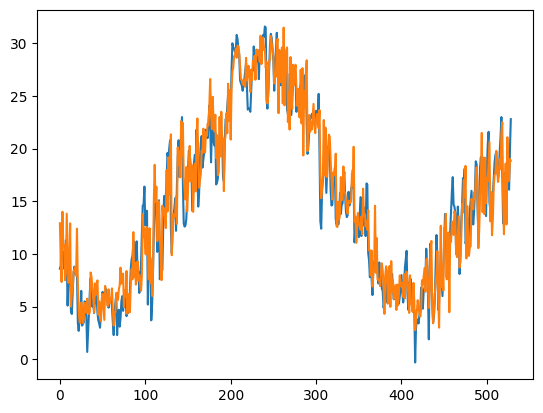

In [125]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Read Japanese weather data
df = pd.read_csv('./weather.csv', parse_dates=True, index_col=0)
df_train, df_test = train_test_split(df, test_size=0.3, shuffle=False)

# Make training data and test data
# Predict the average temperature in the next day using the previous 20 days data
window_size = 20
n_dim = df_train.shape[1]
n_train = len(df_train) - window_size
n_test = len(df_test) - window_size

train = np.zeros((n_train, window_size, n_dim))
train_label = np.zeros((n_train, n_dim))
for i in range(n_train):
    train[i] = df_train[i:i+window_size]
    train_label[i] = df_train[i+window_size:i+window_size+1]
train_label = train_label[:,2]

dataset = torch.utils.data.TensorDataset(torch.tensor(train, dtype=torch.float),  torch.tensor(train_label, dtype=torch.float))
train_loader = torch.utils.data.DataLoader(dataset, batch_size=4, shuffle=True)

test = np.zeros((n_test, window_size, n_dim))
test_label = np.zeros((n_test, n_dim))
for i in range(n_test):
    test[i] = df_test[i:i+window_size]
    test_label[i] = df_test[i+window_size:i+window_size+1]
test = torch.tensor(test, dtype=torch.float)
test_label = test_label[:,2]

# Define the neural network model with LSTM
class TSLSTM(torch.nn.Module):
    def __init__(self, feature_size, hidden_dim, n_layers=1):
        super(TSLSTM, self).__init__()
        
        self.feature_size = feature_size
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers
        self.n_output = 1
        
        self.lstm = torch.nn.LSTM(feature_size, hidden_dim, n_layers, batch_first=True)
        self.l = torch.nn.Linear(hidden_dim, self.n_output)
        
    def forward(self, x):
        h0 = torch.zeros(self.n_layers, x.size(0), self.hidden_dim)
        c0 = torch.zeros(self.n_layers, x.size(0), self.hidden_dim)
        
        output, (hn, cn) = self.lstm(x, (h0, c0))
        y = self.l(hn.squeeze(0))

        return y

feature_size = 6
n_hidden = 64
n_layers = 1
model = TSLSTM(feature_size, n_hidden, n_layers)

criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
epochs = 200
for epoch in range(epochs):
    total_loss = 0.0
    for i, (x, l) in enumerate(train_loader):
        optimizer.zero_grad()
        
        y = model(x)
        loss = criterion(y.reshape(-1), l)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    print('{0} Loss: {1}'.format(epoch+1, total_loss/i))

pred = model(test).detach().numpy()

plt.plot(range(n_test), test_label)
plt.plot(range(n_test), pred)